# Assignment 2 - Logistic Regression
> **FULL MARKS = 10**

In this assignment, you are going to implement your own logistic Regression function. Please notice **no** library versions of logistic regression are allowed. Follow the instructions, you will need to fill the blanks to make it functional. The process is similar to the previous assignment. 

***Initialization***

*No more library allowed*

In [268]:
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import scipy.optimize as opt

Load data *(Do not modify)*
_________

We use 100 samples and 2 features. 


In [269]:
x, y = load_iris(return_X_y=True)

In [270]:
x=x[:100, :2] # class 0 and 1 balanced
y=y[:100]

**Visualize data**
___________

In [271]:
# draw raw data
def draw_data(x,y):
    
    #########################################################################
    # Full Mark: 1                                                          #    
    # TODO:                                                                 #
    # 1. make a scatter plot of the raw data                                #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################

    plt.title("Logistic Regression")
    plt.xlabel("x")
    plt.ylabel("y")
    pos = np.where(y == 0)
    neg = np.where(y == 1)
    plt.scatter(x[pos, 0], x[pos, 1], marker='x', color='r', label='class0')
    plt.scatter(x[neg, 0], x[neg, 1], marker='o', color='b', label='class1')
    plt.legend()
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

Your plot should be similar to the example below

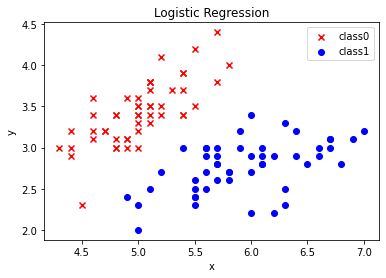

In [272]:
draw_data(x,y)

**Sigmoid function**
________________

In [273]:
# please do not modify this cell
x = np.concatenate((np.array([np.ones(len(y))]).T, x), axis=1)
theta = np.zeros(x.shape[1])

**You can decide by yourselves whether to split the dataset to training and testing. The training and testing datasets spliting is not a part of the assignment 2 as you have done that in assignmnet 1. Without spliting, you can just report the accuracy on training dataset. **

In [274]:
# define sigmoid function
# math: refer to https://en.wikipedia.org/wiki/Sigmoid_function or slides
def sigmoid(theta, X):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. implement the sigmoid function over input theta and X
    #########################################################################
    
    s = y_ = np.dot(X, theta)
    s = 1.0 / (1 + np.exp(-y_))
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    
    return s

**Cost function**
____________

In [275]:
# define cost function with sigmoid function
def cost(theta, X, y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. implement the cross entropy loss function with sigmoid             #
    #########################################################################
    
    hx = sigmoid(theta, X)
    if np.sum(1 - hx < 1e-10) != 0:
        return np.inf
    co = -np.mean(np.multiply(y, np.log(hx)) + np.multiply(1 - y, np.log(1 - hx)))
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return co

**Calculate gradients**
________________

In [276]:
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)
def gradient(theta, X, y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. calculate the gradients using theta and sigmoid                    #
    # Hint: X may need to be transposed to do matrix operation              #
    #########################################################################
    
    y_ = sigmoid(theta, X)
    grad = np.dot(X.T,  y_ - y)/len(X)
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return grad

**Predicting**
________________

In [277]:
# predict for new X
def predict(theta, X):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. predict the value using theta and sigmoid                          #
    # 2. convert the predicted value to 0/1                                 #
    # That's how it is called Logistic regression                           #
    #########################################################################
    
    m = len(X)
    predict_labels = np.zeros((m,))
    pos = np.where(sigmoid(theta, X) >= 0.5)
    neg = np.where(sigmoid(theta, X) < 0.5)
    predict_labels[pos] = 1
    predict_labels[neg] = 0
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    return predict_labels

**Calculate accuracy**
________________

In [278]:
# calculate accuracy
def accurate(predictions, y):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. calculate the accuracy value                                       #
    # Note that you coud not import extra library                           #
    #########################################################################
    
    accuracy_score = np.sum(predictions == y) / len(y)
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return accuracy_score

**Calling functions**
________

In [279]:
# please do not modify this cell
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))
final_theta = result[0]
final_cost = cost(final_theta, x, y)
predictions = predict(final_theta, x)
accuracy = accurate(predictions, y)
print("final cost is " + str(final_cost))
print("accuracy is " + str(accuracy))

final cost is 0.05171662365467926
accuracy is 0.99


**Decsion boudary** 

In [280]:
# draw decision boudary
def draw_decision_boudary(final_theta,x,y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. plot the decision boudary on the raw data                          #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################
    
    plt.title("Logistic Regression")
    plt.xlabel("x")
    plt.ylabel("y")
    pos = np.where(y == 0)
    neg = np.where(y == 1)
    plt.scatter(x[pos, 1], x[pos, 2], marker='x', color='r', label='class0')
    plt.scatter(x[neg, 1], x[neg, 2], marker='o', color='b', label='class1')

    plot_x = np.array([np.min(x[:, 1]) - 1, np.max(x[:, 1] + 1)])
    plot_y = -1 / final_theta[2] * (final_theta[1] * plot_x + final_theta[0])

    plt.plot(plot_x, plot_y)

    plt.legend()

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

Your plot should be similar to the example below

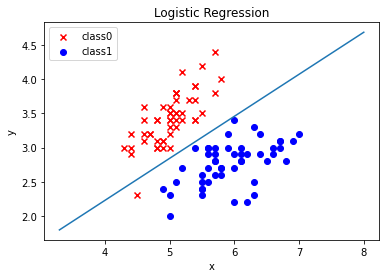

In [281]:
draw_decision_boudary(final_theta,x,y)